1. Import the Required **Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models  import load_model
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2



google drive is imported


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing of dataset

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/Food_image")

Found 10000 files belonging to 10 classes.


i. Get the Image Dataset Paths


In [ ]:
train_dataset_path = '/content/gdrive/MyDrive/train_dataset'
validation_dataset_path = '/content/gdrive/MyDrive/validation_dataset'

ii. Load Image Datasets



In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
BATCH_SIZE = 32

Loading the training dataset and applying augmentations on it.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 7000 images belonging to 10 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 3000 images belonging to 10 classes.


Get the Label Mappings


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : cheese_plate
1 : chicken_wings
2 : chocolate_cake
3 : club_sandwich
4 : donuts
5 : dumplings
6 : fried_rice
7 : omelette
8 : onion_rings
9 : samosa


3. Plotting Sample Training Images

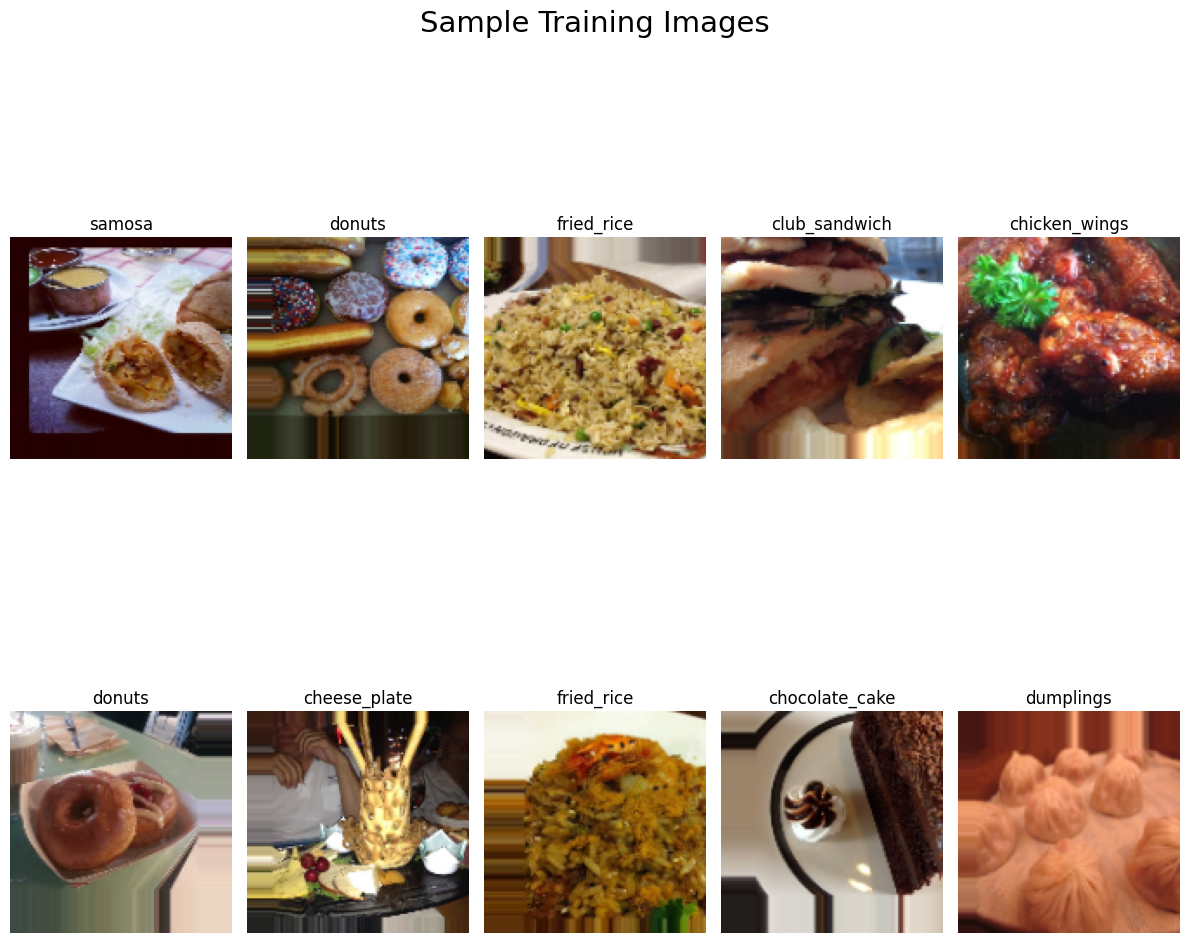

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()


4. Training a CNN Model


In [ ]:
def create_model():
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=128, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=128, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),



        Flatten(),

        Dense(units=255, activation='relu'),
        Dropout(0.1),
        Dense(units=10, activation='softmax')
    ])

    return model

In [ ]:
cnn_model = create_model()

In [ ]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 63, 63, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0

Defining the Optimizer


In [ ]:
optimizer = Adam(learning_rate=0.001)

Compile the Model

In [ ]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

Training the Model

In [ ]:
history = cnn_model.fit(train_generator, epochs=20, validation_data=validation_generator,
                       verbose=2,
                       )

Epoch 1/20
219/219 - 2365s - loss: 2.1290 - accuracy: 0.2946 - val_loss: 2.6846 - val_accuracy: 0.1193 - 2365s/epoch - 11s/step
Epoch 2/20
219/219 - 319s - loss: 1.8638 - accuracy: 0.3661 - val_loss: 2.0592 - val_accuracy: 0.3097 - 319s/epoch - 1s/step
Epoch 3/20
219/219 - 319s - loss: 1.7118 - accuracy: 0.4207 - val_loss: 1.8779 - val_accuracy: 0.3867 - 319s/epoch - 1s/step
Epoch 4/20
219/219 - 321s - loss: 1.6098 - accuracy: 0.4481 - val_loss: 1.7874 - val_accuracy: 0.4157 - 321s/epoch - 1s/step
Epoch 5/20
219/219 - 360s - loss: 1.5287 - accuracy: 0.4786 - val_loss: 1.7063 - val_accuracy: 0.4377 - 360s/epoch - 2s/step
Epoch 6/20
219/219 - 315s - loss: 1.4677 - accuracy: 0.5071 - val_loss: 1.7144 - val_accuracy: 0.4447 - 315s/epoch - 1s/step
Epoch 7/20
219/219 - 323s - loss: 1.4065 - accuracy: 0.5241 - val_loss: 1.6010 - val_accuracy: 0.4873 - 323s/epoch - 1s/step
Epoch 8/20
219/219 - 318s - loss: 1.3599 - accuracy: 0.5421 - val_loss: 1.8190 - val_accuracy: 0.4507 - 318s/epoch - 1s/st

5. Plotting the Model Metrics


i. Plotting training and validation accuracy, loss and learning rate


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history



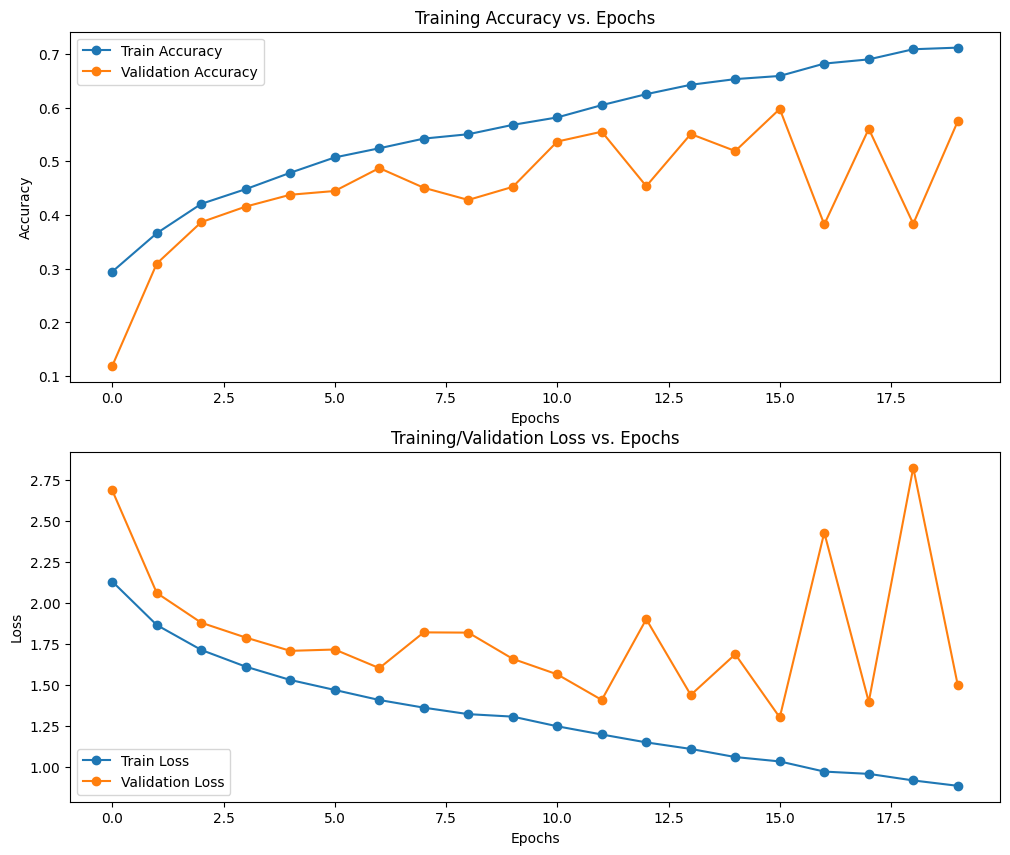

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



6. Testing the Model on Test Set

In [ ]:
test_dataset = '/content/gdrive/MyDrive/food_test'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 400 images belonging to 10 classes.


7. Model Prediction on the Test Dataset

In [ ]:
predictions = cnn_model.predict(test_generator)


13/13 [==============================] - 91s 8s/step


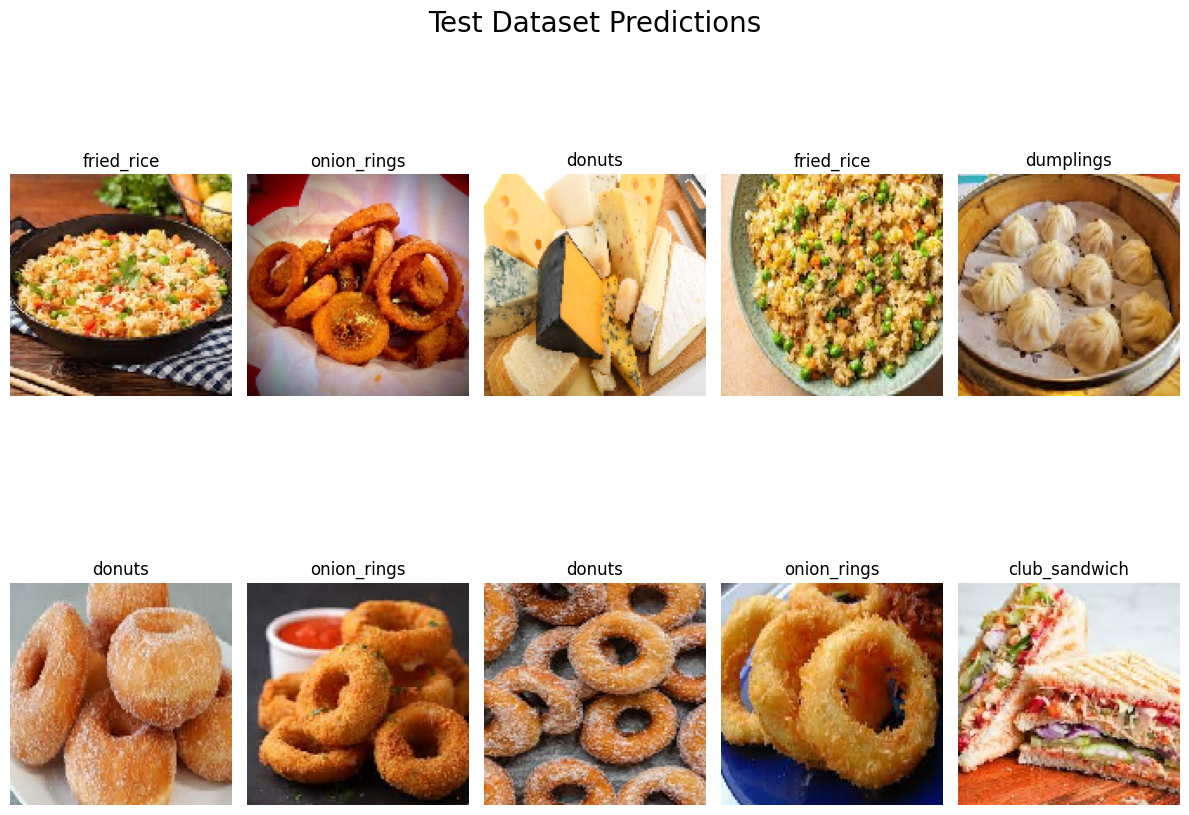

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()


In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

13/13 [==============================] - 5s 383ms/step - loss: 1.6538 - accuracy: 0.6150


In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss:     1.6537710428237915
Test Accuracy: 0.6150000095367432


8. Plotting the Classification Metrics


In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

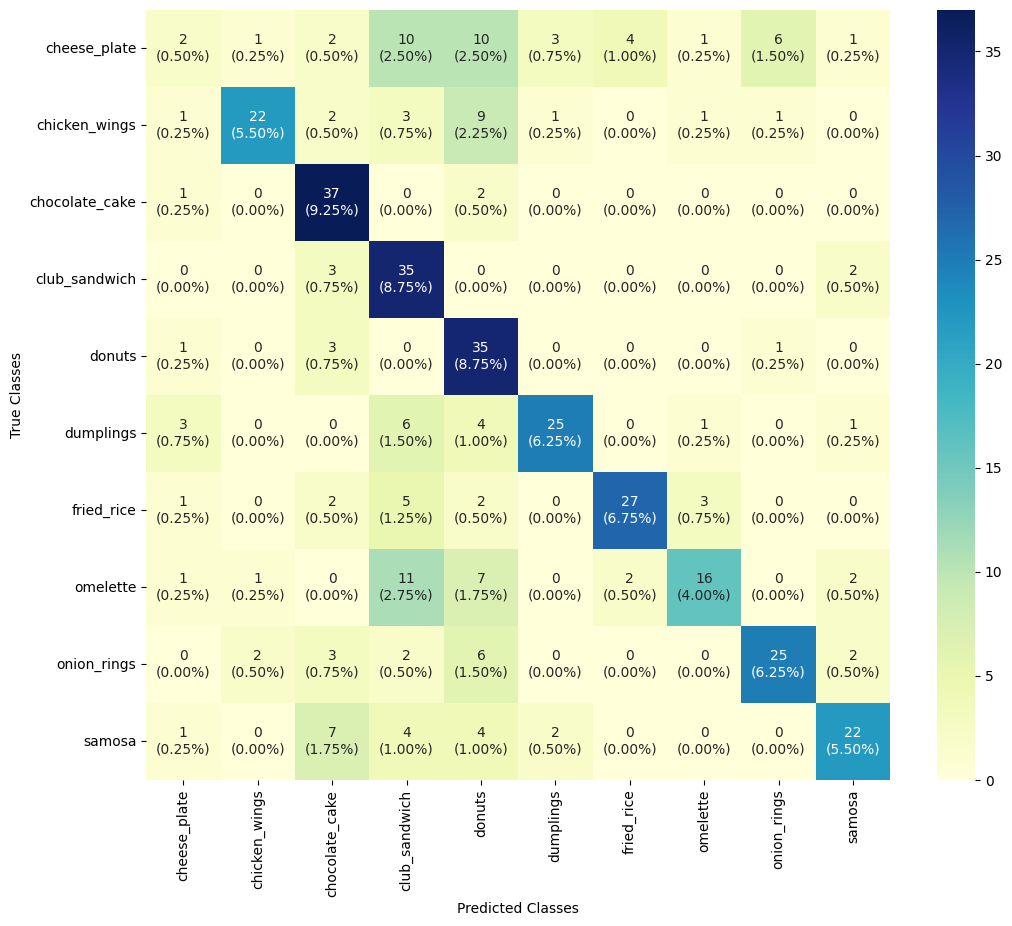

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(10, 10)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                precision    recall  f1-score   support

  cheese_plate       0.18      0.05      0.08        40
 chicken_wings       0.85      0.55      0.67        40
chocolate_cake       0.63      0.93      0.75        40
 club_sandwich       0.46      0.88      0.60        40
        donuts       0.44      0.88      0.59        40
     dumplings       0.81      0.62      0.70        40
    fried_rice       0.82      0.68      0.74        40
      omelette       0.73      0.40      0.52        40
   onion_rings       0.76      0.62      0.68        40
        samosa       0.73      0.55      0.63        40

      accuracy                           0.61       400
     macro avg       0.64      0.61      0.60       400
  weighted avg       0.64      0.61      0.60       400



9. Wrong Predictions


In [ ]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [ ]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

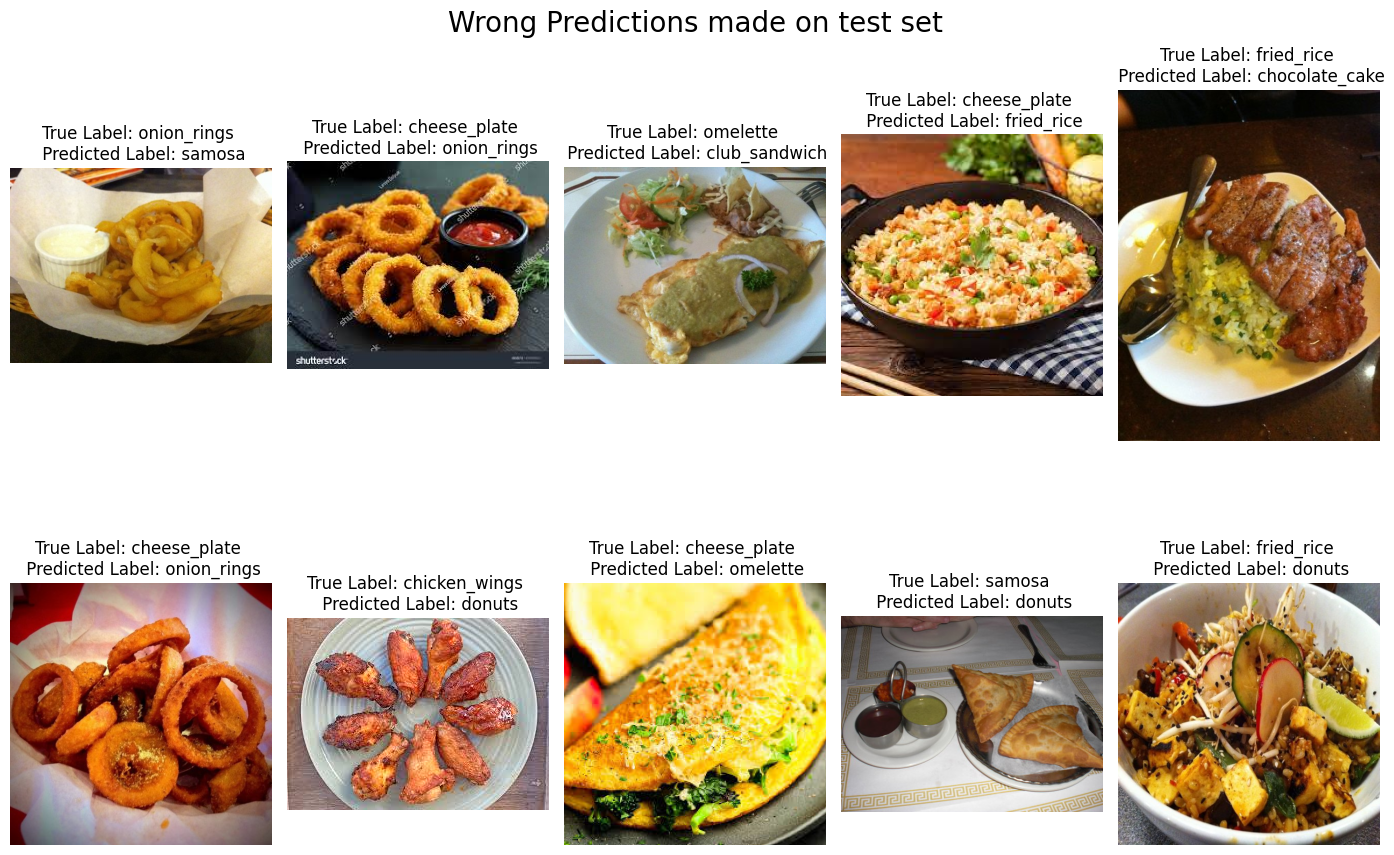

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(14, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()


In [ ]:
cnn_model.save('/content/gdrive/MyDrive/Saved_Model/SGD_Model.h5')
